In [185]:
import re
import docx2txt
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## Extract programming language from Knowledge Graph

In [186]:

file_name_1 = 'aagam.docx'

file_name_2 = 'Mihika Dravid.docx'

In [191]:
def extract_programming_languages(file_name):
    # read in word file
    result = docx2txt.process(file_name)
    programming_languages_pattern = re.search(r'Programming Languages:[A-Za-z,\s0-9]*\.',result)
    programming_languages_line = programming_languages_pattern.group(0)

    languages = re.sub("Programming Languages: ","", programming_languages_line)
    languages = re.sub("\.","",languages)
    languages_clean = languages.split(', ')
    print(languages_clean)
    return languages_clean

In [192]:

name_1 = file_name_1.split('.')[0]

name_2 = file_name_2.split('.')[0]


languages_aagam = extract_programming_languages(file_name_1)

languages_mihika = extract_programming_languages(file_name_2)

['Python', 'R', 'CSS', 'SQL']
['JavaScript', 'HTML5', 'Python', 'C', 'SQL', 'MySQL']


## Create and Visualize a Knowledge Graph

In [193]:
names = [name_1,name_2]

def draw_graph(e_dict):
    # create a directed-graph from a dataframe
    G=nx.from_dict_of_lists(e_dict,create_using=nx.MultiDiGraph())
    plt.figure(figsize=(12,12))
    
    pos = nx.spring_layout(G)
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = 4500, font_size = 18)
    plt.show()


### Knowledge Graph - Single Candidate

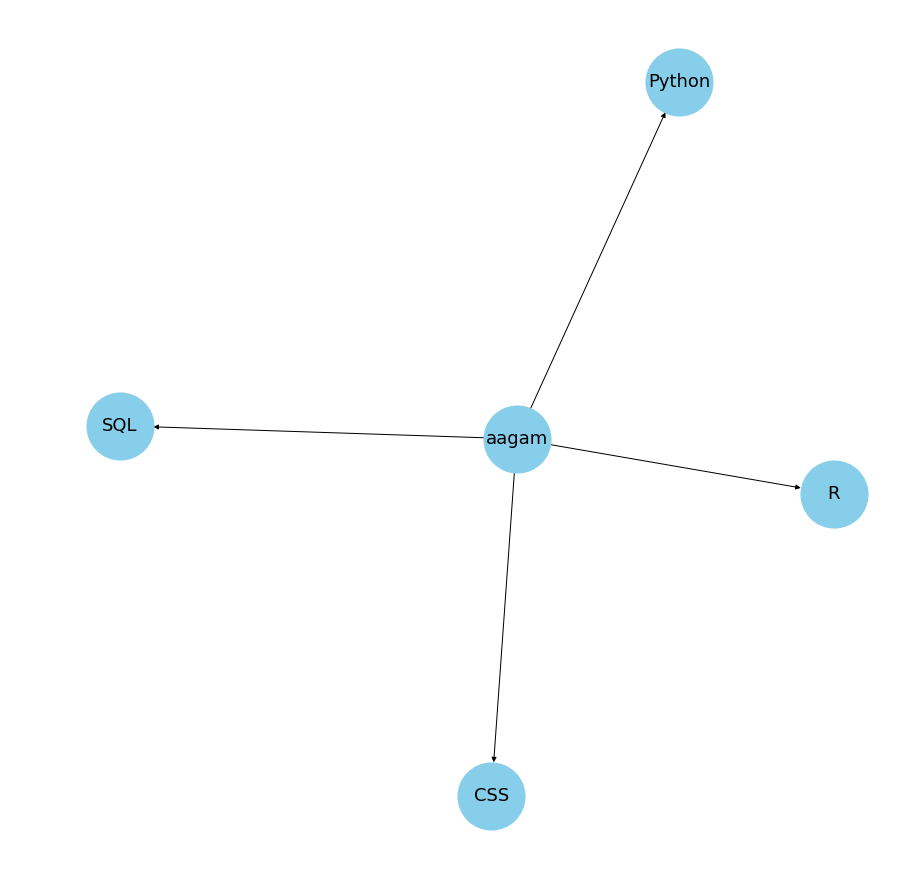

In [194]:
edge_dict = {}
edge_dict[names[0]] = languages_aagam
draw_graph(edge_dict)

### Knowledge Graph for Multiple Candidates

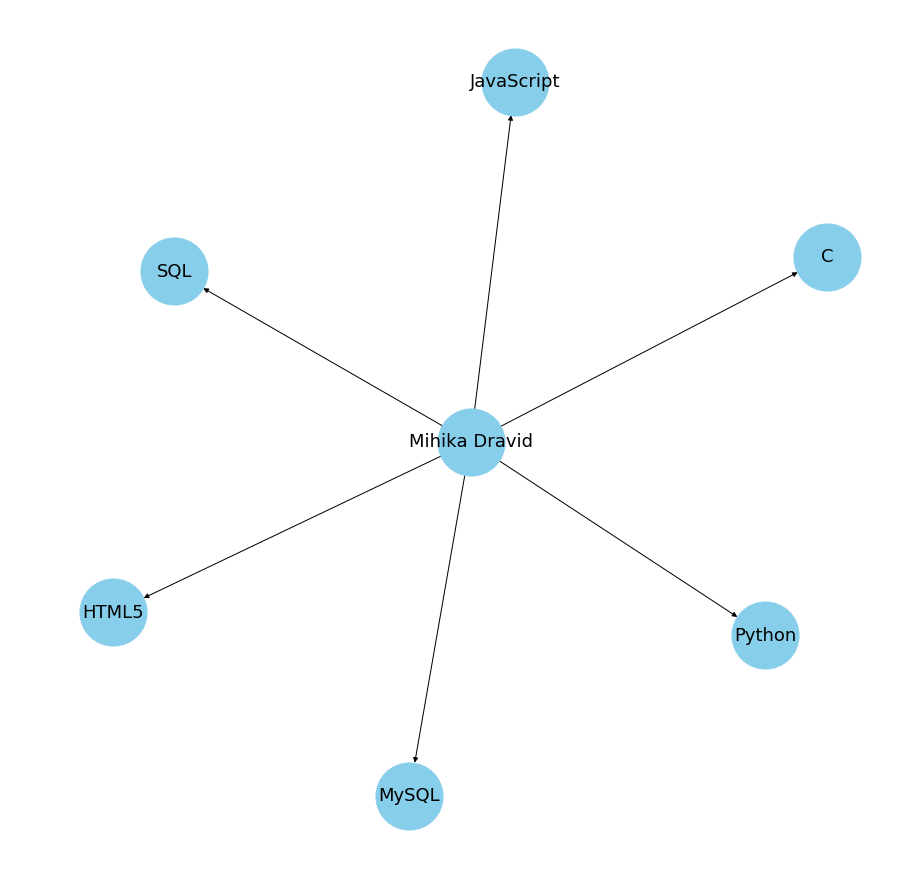

In [195]:
edge_dict = {}
edge_dict[names[1]] = languages_mihika

draw_graph(edge_dict)

In [196]:
edge_dict = {}

edge_dict[names[0]] = languages_aagam

edge_dict[names[1]] = languages_mihika

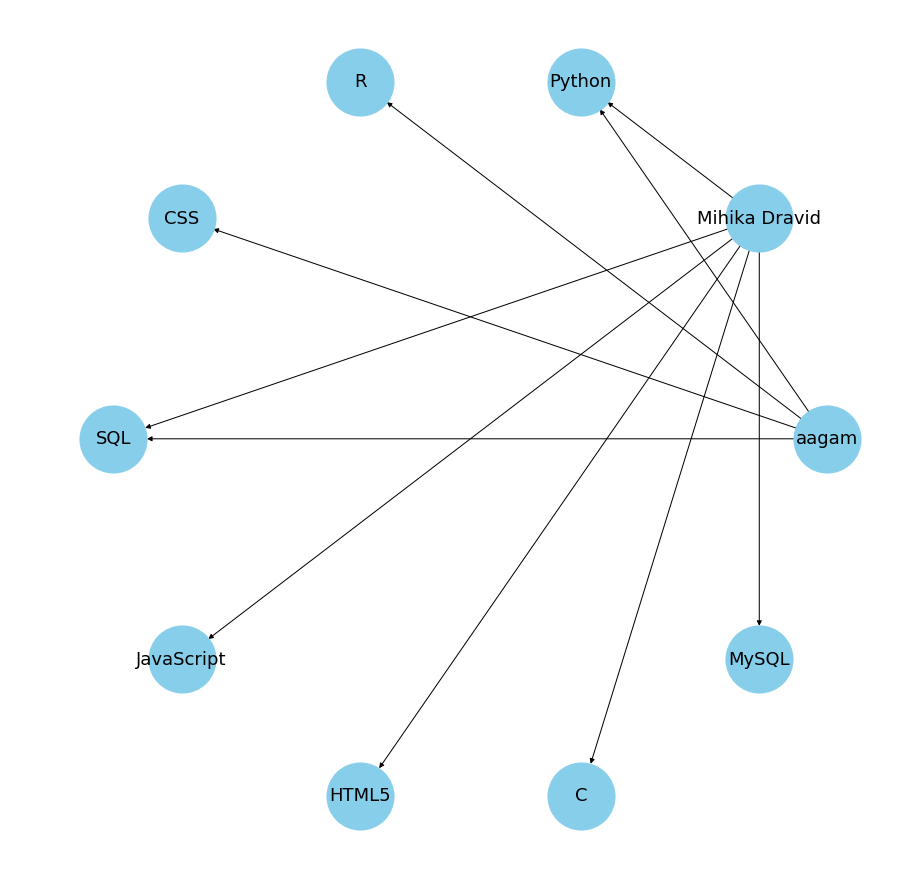

In [197]:
G=nx.from_dict_of_lists(edge_dict, 
                         create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=4500, edge_cmap=plt.cm.Blues, pos = pos, font_size=18)
plt.show()